In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import datetime

Populating the interactive namespace from numpy and matplotlib


In [2]:
filename ='prosperLoanData.csv'
df = pd.read_csv(filename, header=0)

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df[['CreationDate','CreationTime']] =df.ListingCreationDate.str.split(" ",expand=True,)

In [5]:
df[['ClosedDate','ClosedTime']] =df.ClosedDate.str.split(" ",expand=True,)

In [6]:
df[['OriginationQuarter','OriginationYear']] =df.LoanOriginationQuarter.str.split(" ",expand=True,)

In [7]:
df.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 86 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [65]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [23]:
df.corr(method='pearson')

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
ListingNumber,1.000000,0.319971,-0.031520,-0.114391,-0.113544,-0.217721,-0.239568,-0.461391,0.209200,-0.106235,...,0.208286,0.104191,-0.251739,-0.247716,-0.096004,0.014688,-0.126031,-0.092813,-0.053481,-0.279659
Term,0.319971,1.000000,-0.011183,0.020085,0.020556,0.057047,-0.107140,0.152505,0.079179,0.028947,...,-0.167600,0.035841,-0.038353,-0.035981,-0.034157,-0.028806,-0.056680,-0.043507,-0.024472,-0.045137
BorrowerAPR,-0.031520,-0.011183,1.000000,0.989824,0.989329,0.895635,0.949538,0.794275,-0.962151,-0.668287,...,0.116974,-0.041452,0.067301,0.067385,0.028519,-0.028236,-0.044236,-0.046757,-0.031841,-0.307606
BorrowerRate,-0.114391,0.020085,0.989824,1.000000,0.999211,0.895282,0.945297,0.817670,-0.953105,-0.649736,...,0.095993,-0.053378,0.100635,0.100308,0.042059,-0.029025,-0.030579,-0.037312,-0.026512,-0.274217
LenderYield,-0.113544,0.020556,0.989329,0.999211,1.000000,0.895343,0.945308,0.817654,-0.953119,-0.649783,...,0.097854,-0.052954,0.099506,0.099195,0.041025,-0.029209,-0.031069,-0.037302,-0.026632,-0.274174
EstimatedEffectiveYield,-0.217721,0.057047,0.895635,0.895282,0.895343,1.000000,0.798135,0.801568,-0.848394,-0.632003,...,0.058309,-0.068708,0.139421,0.138712,0.049014,-0.043366,-0.046694,-0.063848,-0.038146,-0.265244
EstimatedLoss,-0.239568,-0.107140,0.949538,0.945297,0.945308,0.798135,1.000000,0.591056,-0.964182,-0.673727,...,0.197471,-0.061119,0.093338,0.092053,0.051049,-0.022738,0.004081,0.009475,0.024555,-0.275501
EstimatedReturn,-0.461391,0.152505,0.794275,0.817670,0.817654,0.801568,0.591056,1.000000,-0.659980,-0.383211,...,-0.136274,-0.094614,0.196384,0.194479,0.075053,-0.039422,-0.019886,-0.043022,-0.031902,-0.092337
ProsperRating (numeric),0.209200,0.079179,-0.962151,-0.953105,-0.953119,-0.848394,-0.964182,-0.659980,1.000000,0.705221,...,-0.211337,0.058148,-0.086118,-0.084943,-0.046824,0.012491,0.004772,0.007746,-0.010459,0.307753
ProsperScore,-0.106235,0.028947,-0.668287,-0.649736,-0.649783,-0.632003,-0.673727,-0.383211,0.705221,1.000000,...,-0.231464,0.020133,-0.024836,-0.024789,-0.017835,-0.019344,0.026658,0.028343,0.003131,0.320594


In [7]:
df_final = df[["LoanStatus","ClosedDate","LenderYield","ProsperScore","BorrowerState","Occupation","LoanOriginationQuarter", "CreditScoreRangeLower"]]

In [8]:
df_minimised = df[["LenderYield","ProsperScore","BorrowerState","Occupation","OriginationYear", "CreditScoreRangeLower", "LoanOriginationQuarter"]]
df_minimised = df_minimised.dropna()
df_minimised.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83520 entries, 1 to 113936
Data columns (total 7 columns):
LenderYield               83520 non-null float64
ProsperScore              83520 non-null float64
BorrowerState             83520 non-null object
Occupation                83520 non-null object
OriginationYear           83520 non-null object
CreditScoreRangeLower     83520 non-null float64
LoanOriginationQuarter    83520 non-null object
dtypes: float64(3), object(4)
memory usage: 5.1+ MB


In [9]:
df_minimised.head()

,LenderYield,ProsperScore,BorrowerState,Occupation,OriginationYear,CreditScoreRangeLower,LoanOriginationQuarter
1,0.0820,7.0,CO,Professional,2014,680.0,Q1 2014
3,0.0874,9.0,GA,Skilled Labor,2012,800.0,Q4 2012
4,0.1985,4.0,MN,Executive,2013,680.0,Q3 2013
5,0.1214,10.0,NM,Professional,2013,740.0,Q4 2013
6,0.2612,2.0,KS,Sales - Retail,2013,680.0,Q2 2013


In [10]:
df_grouped = df_minimised.groupby(['BorrowerState',"LoanOriginationQuarter"], as_index=False)\
    .agg({"LenderYield":"mean", "ProsperScore":"mean", "CreditScoreRangeLower":"mean", "Occupation":"count"})\
    .rename(columns={"Occupation":"Number of Loans", "LenderYield":"Lenders Yield", "ProsperScore":"Prosper Score",\
                    "BorrowerState":"State", "LoanOriginationQuarter":"Quarter", "CreditScoreRangeLower":"Credit Score"})

In [15]:
df_grouped.head()


,State,Quarter,Credit Score,Prosper Score,Lenders Yield,Number of Loans
0,AK,Q1 2010,660.000000,3.666667,0.290000,3
1,AK,Q1 2011,732.000000,7.600000,0.180380,5
2,AK,Q1 2012,695.555556,6.555556,0.189233,9
3,AK,Q1 2013,688.888889,4.000000,0.206767,9
4,AK,Q1 2014,691.034483,5.724138,0.146845,29


In [50]:
qorder = ["Q1 2006","Q2 2006","Q3 2006","Q4 2006","Q1 2007","Q2 2007","Q3 2007","Q4 2007","Q1 2008","Q2 2008","Q3 2008","Q4 2008","Q1 2009","Q2 2009","Q3 2009","Q4 2009","Q1 2010","Q2 2010","Q3 2010","Q4 2010","Q1 2011","Q2 2011","Q3 2011",
"Q4 2011","Q1 2012","Q2 2012","Q3 2012","Q4 2012","Q1 2013","Q2 2013","Q3 2013","Q4 2013","Q1 2014"]

[<matplotlib.text.Text at 0x18991c18>, <matplotlib.text.Text at 0x18a28358>]

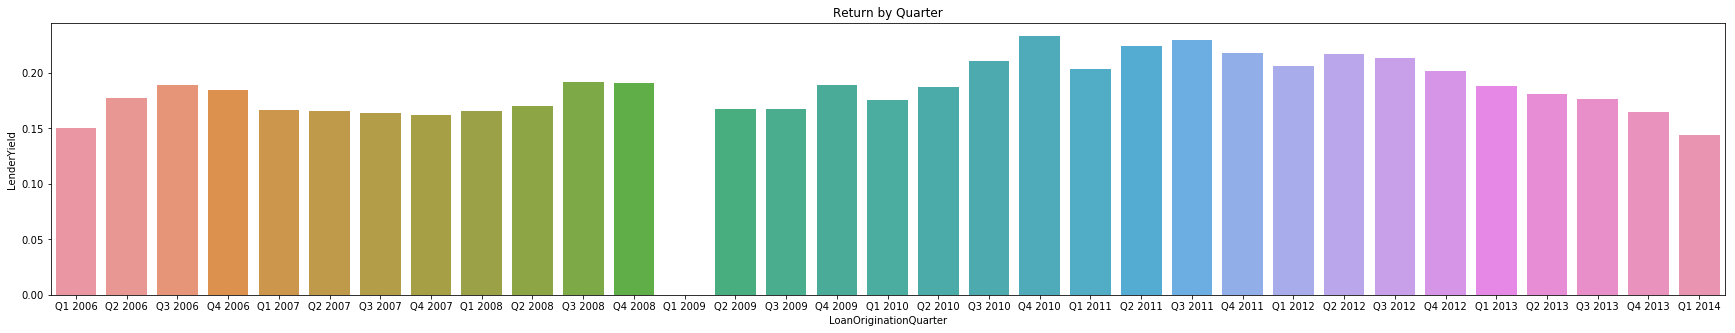

In [52]:
plt.subplots(figsize=(30,5))
p = sns.barplot(data = df_final.groupby(['LoanOriginationQuarter'], as_index = False)['LenderYield'].mean(), x = 'LoanOriginationQuarter', y = 'LenderYield',
               order=qorder)

# Labels
p.set(ylabel = 'LenderYield', title = 'Return by Quarter')


[<matplotlib.text.Text at 0x18ec08d0>, <matplotlib.text.Text at 0x18f94dd8>]

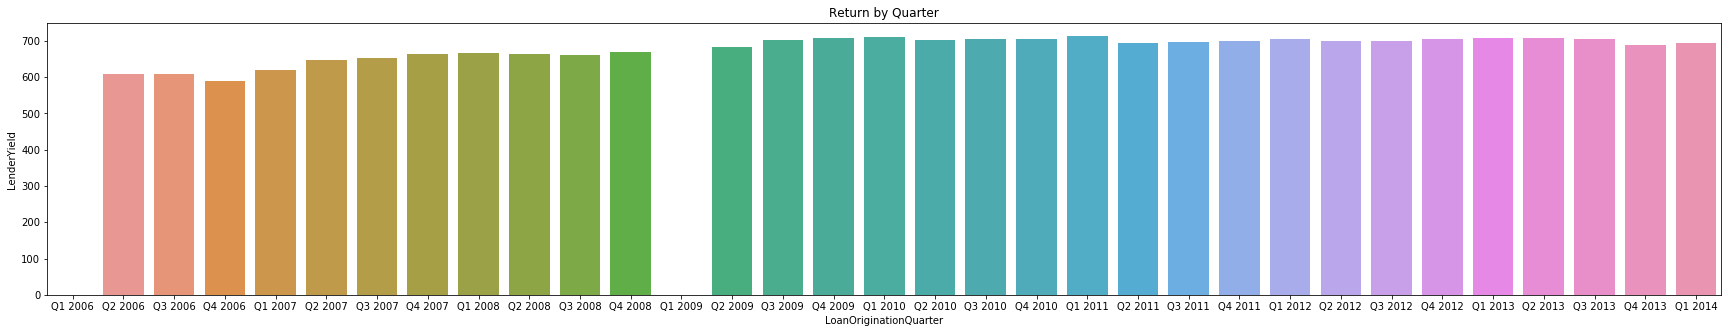

In [55]:
plt.subplots(figsize=(30,5))
p = sns.barplot(data = df_final.groupby(['LoanOriginationQuarter'], as_index = False)['CreditScoreRangeLower'].mean(), x = 'LoanOriginationQuarter', y = 'CreditScoreRangeLower',
               order=qorder)

# Labels
p.set(ylabel = 'LenderYield', title = 'Return by Quarter')


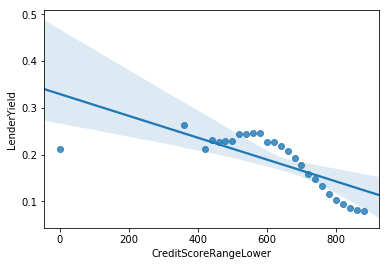

In [63]:
p = sns.regplot(data = df_final.groupby(['CreditScoreRangeLower'], as_index = False)['LenderYield'].mean(), x = 'CreditScoreRangeLower', y = 'LenderYield')


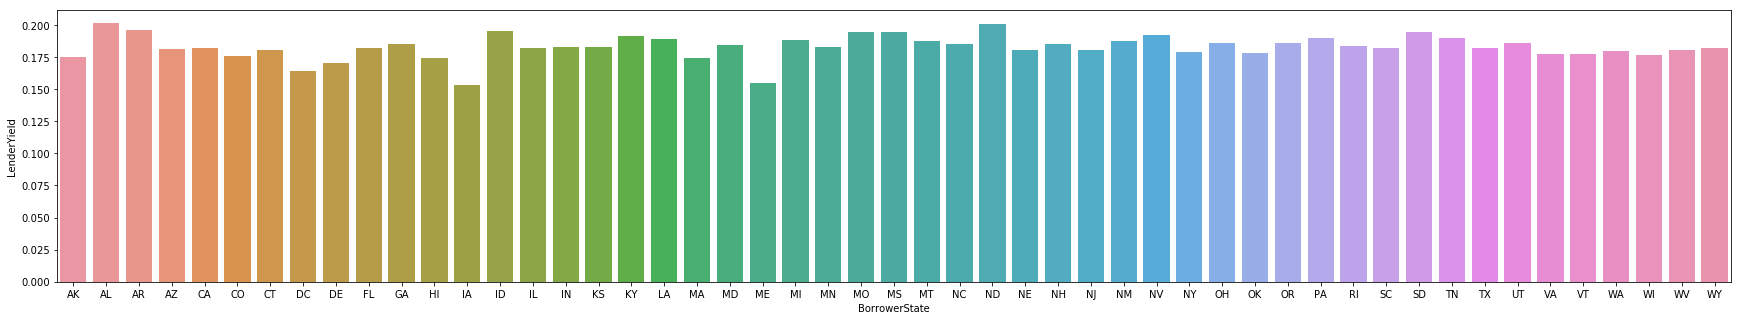

In [58]:
plt.subplots(figsize=(30,5))
p = sns.barplot(data = df_final.groupby(['BorrowerState'], as_index = False)['LenderYield'].mean(), x = 'BorrowerState', y = 'LenderYield')


In [64]:
df_final.to_csv('clean_prosper_data.csv')

In [8]:
df_minimised.to_csv('clean_prosper_data.csv',  index=False)

In [92]:
df_grouped.to_csv('clean_prosper_data_1.csv',  index=False)

In [13]:
df_grouped.to_csv('clean_prosper_data_3.csv',  index=False)